## Final Project Submission

Please fill out:
* Student name: Alain Leukam
* Student pace:  part time
* Scheduled project review date/time: 
* Instructor name: Abhineet
* Blog post URL:


Flight delays are most of the time very frustrating to passengers and costly to airline companies. Flight delays are not easy to understand as they arise from multiple reasons like increase in air traffic at the origin or destination airport, weather etc. The arrival delay data of a few airline carrier could be useful to understand some  causes of flight delays.

The goal of this project is to construct a flight delay prediction model leveraging flight On-Time performance data and use the model for deriving insights about past flight delays. The on-time arrival data for non-stop domestic flights from US Department of Transportation(DoT) was used for this analysis.

The modeling approach involves using traditional & popular machine learning algorithms like Decision trees & Random Forest to predict airline delays. This notebook contains sections for dataset exploration, data cleansing, data visualizations, training and evaluation of classification models, and model interpretation. Common model evaluation metrics like sensitivity, specificity, ROC curves and accuracy scores were used for model evaluation.

In [1]:
#importing the libraries needed for our Project.
import pandas as pd
import numpy as np
np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
# Checking the data out
flights = pd.read_csv('flights.csv')
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
airlines = pd.read_csv('airlines.csv')
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
YEAR                   1048575 non-null int64
MONTH                  1048575 non-null int64
DAY                    1048575 non-null int64
DAY_OF_WEEK            1048575 non-null int64
AIRLINE                1048575 non-null object
FLIGHT_NUMBER          1048575 non-null int64
TAIL_NUMBER            1040825 non-null object
ORIGIN_AIRPORT         1048575 non-null object
DESTINATION_AIRPORT    1048575 non-null object
SCHEDULED_DEPARTURE    1048575 non-null int64
DEPARTURE_TIME         1009060 non-null float64
DEPARTURE_DELAY        1009060 non-null float64
TAXI_OUT               1008346 non-null float64
WHEELS_OFF             1008346 non-null float64
SCHEDULED_TIME         1048573 non-null float64
ELAPSED_TIME           1005504 non-null float64
AIR_TIME               1005504 non-null float64
DISTANCE               1048575 non-null int64
WHEELS_ON              1007279 non-null f

In [5]:
flights.shape

(1048575, 31)

The data contains 1048575 row and 31 columns. 

In [6]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Just looking at the 5 first row of our data above, it is clear that we have a lot of missing data. We will have to do some cleaning and a few transformations before any visualization.

In [7]:
# Determining the percentage of missing values per cololumn
missing_values = flights.isna().sum()*100/flights.shape[0]
missing_values

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.739098
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          3.768448
DEPARTURE_DELAY         3.768448
TAXI_OUT                3.836540
WHEELS_OFF              3.836540
SCHEDULED_TIME          0.000191
ELAPSED_TIME            4.107575
AIR_TIME                4.107575
DISTANCE                0.000000
WHEELS_ON               3.938297
TAXI_IN                 3.938297
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            3.938297
ARRIVAL_DELAY           4.107575
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    96.135040
AIR_SYSTEM_DELAY       78.205851
SECURITY_DELAY         78.205851
AIRLINE_DELAY          78.205851
LATE_AIRCRAFT_DELAY    78.205851
WEATHER_DE

We have a lot of missing values in these 6 columns:CANCELLATION_REASON (96.135040%), AIR_SYSTEM_DELAY(78.205851%), SECURITY_DELAY (78.205851%), AIRLINE_DELAY (78.205851%), LATE_AIRCRAFT_DELAY(78.205851%), WEATHER_DELAY(78.205851%). We could be tempted to just delete those columns base on the facts that a column is missing more than 75% of its data. In this case we are trying to model the delays of the flights and the columns in question are somehow link to the delays. We will analyse each column separately and find a way to replace the missing values. 

In [8]:
flights['CANCELLATION_REASON'].value_counts()#Checking to see the diffents types of reason for cancellation.

B    28260
A     6974
C     5291
D        2
Name: CANCELLATION_REASON, dtype: int64

Using the code of federal regulation, reporting flight cancellation should use one of the letters A, B, C or D explained as: A - Airline/Carrier
    B - Weather
    C - National Air System
    D - Security
Giving the fact that the main cause of cancellation is the weather, this will also apply to the delays, we will be missing valuable data if we just delete this column. A, B, C and D are categorical values, we will manually replace them respectively with 1, 2, 3 and 4. The nan will be replace by 0.


In [9]:
# converting categoric value to numeric and NaN data to numeric zero
flights.loc[flights['CANCELLATION_REASON'] == 'A', 'CANCELLATION_REASON'] = 1
flights.loc[flights['CANCELLATION_REASON'] == 'B', 'CANCELLATION_REASON'] = 2
flights.loc[flights['CANCELLATION_REASON'] == 'C', 'CANCELLATION_REASON'] = 3
flights.loc[flights['CANCELLATION_REASON'] == 'D', 'CANCELLATION_REASON'] = 4
flights['CANCELLATION_REASON'] = flights['CANCELLATION_REASON'].fillna(0)

In [10]:
flights['CANCELLATION_REASON'].value_counts()# Verifying

0    1008048
2      28260
1       6974
3       5291
4          2
Name: CANCELLATION_REASON, dtype: int64

After checking the value count for the remaining 5 columns: AIR_SYSTEM_DELAY(78.205851%), SECURITY_DELAY (78.205851%), AIRLINE_DELAY (78.205851%), LATE_AIRCRAFT_DELAY(78.205851%), WEATHER_DELAY(78.205851%, 0.0 is the dominant values and the null values represented by NaN may be due to the fact that the category in question did not actually cause any delay. We will therefore replace the NaNs in our 5 columns with 0.

In [11]:
flights['AIRLINE_DELAY'] = flights['AIRLINE_DELAY'].fillna(0)
flights['AIR_SYSTEM_DELAY'] = flights['AIR_SYSTEM_DELAY'].fillna(0)
flights['SECURITY_DELAY'] = flights['SECURITY_DELAY'].fillna(0)
flights['LATE_AIRCRAFT_DELAY'] = flights['LATE_AIRCRAFT_DELAY'].fillna(0)
flights['WEATHER_DELAY'] = flights['WEATHER_DELAY'].fillna(0)

In [12]:
#We will now drop all the remaining rows with NaN and still have enough data for our modeling
flights = flights.dropna(axis=0, how='any')
flights.isna().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [13]:
flights.shape

(1005504, 31)

In [ ]:
The data contains 1005504 row and 31 columns.

We will get the distribution of the delay by airline company. But first we must merge airlines with flights.

In [14]:
flights = flights.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_y
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,AS,Alaska Airlines Inc.
1,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,0,0.0,0.0,0.0,0.0,0.0,AS,Alaska Airlines Inc.
2,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,...,0,0,0,0.0,0.0,0.0,0.0,0.0,AS,Alaska Airlines Inc.
3,2015,1,1,4,AS,122,N413AS,ANC,PDX,50,...,0,0,0,0.0,0.0,0.0,0.0,0.0,AS,Alaska Airlines Inc.
4,2015,1,1,4,AS,130,N457AS,FAI,SEA,115,...,0,0,0,0.0,0.0,0.0,0.0,0.0,AS,Alaska Airlines Inc.


In [15]:
# dropping old column and rename new one
flights = flights.drop(['AIRLINE_x','IATA_CODE'], axis=1)
flights = flights.rename(columns={"AIRLINE_y":"AIRLINE"})

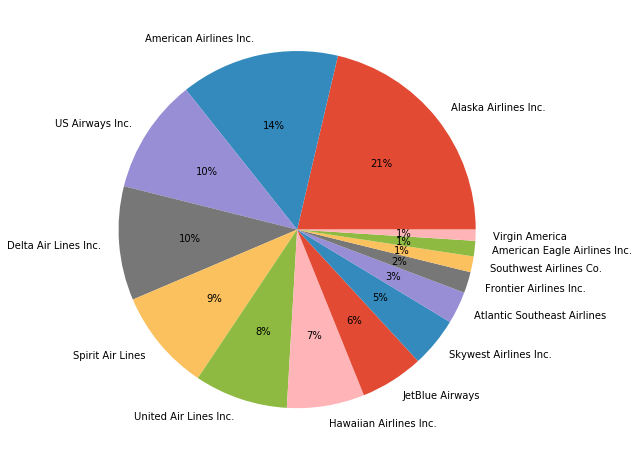

In [16]:
#Proportion of flights per Airline.
f, ax = plt.subplots(figsize=(8, 12))
quality=flights["AIRLINE"].unique()
size=flights["AIRLINE"].value_counts()

plt.pie(size,labels=quality,autopct='%1.0f%%')
plt.show()

Somehow, we are surprise by the result, Alasks Airline seem to have the higher portion of flights.

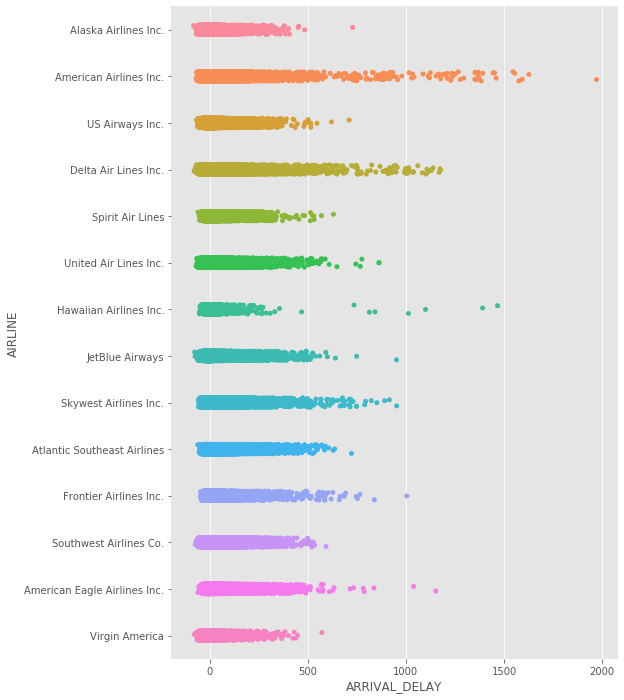

In [17]:
#Now let us check the number of delay by Airline.
f, ax = plt.subplots(figsize=(8, 12))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data=flights, dodge=True, jitter=True
            )
plt.show()

American airline appears to have more delays than any other airline.

We will try to keep our model as simple as possible; we will considere that we have a flight delay when the 'ARRIVAL_DELAY' is greater than 0 and vice versa.

In [ ]:
flights['DELAYED'] = flights.loc[:,'ARRIVAL_DELAY'].values > 0

In [18]:
flights['DELAY'] = np.where(flights.ARRIVAL_DELAY >= 0, 1, 0)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,DELAY
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,0
1,2015,1,1,4,135,N527AS,SEA,ANC,25,24.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,0
2,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,0
3,2015,1,1,4,122,N413AS,ANC,PDX,50,46.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,0
4,2015,1,1,4,130,N457AS,FAI,SEA,115,107.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,0


In [19]:

#We can also drop FLIGHT_NUMBER and TAIL_NUMBER as these may not be relevant to the model
flights = flights.drop([ 'FLIGHT_NUMBER', 'TAIL_NUMBER'], axis=1)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,DELAY
0,2015,1,1,4,ANC,SEA,5,2354.0,-11.0,21.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,0
1,2015,1,1,4,SEA,ANC,25,24.0,-1.0,11.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,0
2,2015,1,1,4,ANC,SEA,45,41.0,-4.0,17.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,0
3,2015,1,1,4,ANC,PDX,50,46.0,-4.0,11.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,0
4,2015,1,1,4,FAI,SEA,115,107.0,-8.0,25.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,0


In [20]:
#Checking the airline companies in the data.
flights['AIRLINE'].unique()

array(['Alaska Airlines Inc.', 'American Airlines Inc.',
       'US Airways Inc.', 'Delta Air Lines Inc.', 'Spirit Air Lines',
       'United Air Lines Inc.', 'Hawaiian Airlines Inc.',
       'JetBlue Airways', 'Skywest Airlines Inc.',
       'Atlantic Southeast Airlines', 'Frontier Airlines Inc.',
       'Southwest Airlines Co.', 'American Eagle Airlines Inc.',
       'Virgin America'], dtype=object)

As per the instructor advise we will limit our model to three main US airlines: AA, UA and DL(American, United and Delta)

In [21]:
#We will start by slicing American Airline, Delta and United Airline data
data_3 = flights[flights['AIRLINE'].isin(['American Airlines Inc.', 'Delta Air Lines Inc.', 'United Air Lines Inc.'])]
data_3.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,DELAY
29311,2015,1,1,4,LAX,PBI,10,2.0,-8.0,12.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.,0
29312,2015,1,1,4,LAX,MIA,20,15.0,-5.0,15.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.,0
29313,2015,1,1,4,SFO,DFW,30,19.0,-11.0,17.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.,0
29314,2015,1,1,4,LAS,MIA,35,27.0,-8.0,21.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.,0
29315,2015,1,1,4,SEA,MIA,100,52.0,-8.0,30.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.,1


In [22]:
data_3.shape

(322045, 30)

Our data now has 322045 rows and 30 columns.

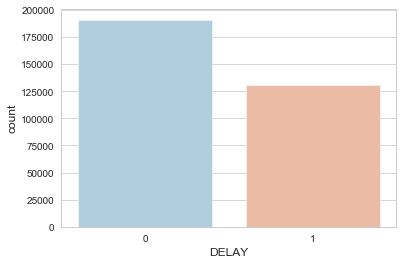

In [23]:
#Visualizing the number of delays versus the number of on time
sns.set_style('whitegrid')
sns.countplot(x='DELAY', data=data_3, palette='RdBu_r')

In [ ]:
data_3.DELAY.value_counts()

In [24]:
#percentage of flight that will be delayed based on our data which is also the baseline of our model.
print ("ratio = ", str( (131030*1.0) / (191015+131030) ))

ratio =  0.40686860531913244


The dataset is moderately asymmetric, with positive arrival delays making up 41% of the samples. This means that a classifier that predicts that there is no arrival delay has an accuracy of 59%.

In [25]:
# We will check to see the columns we have and plot must of them versus the ARRIVAL DELAY.
data_3.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE', 'DELAY'],
      dtype='object')

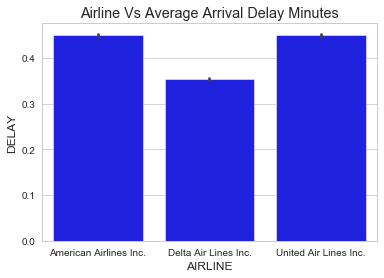

In [26]:
sns.set_style('whitegrid')
carrier_order = np.unique(list(data_3['AIRLINE']))
sns.barplot(x='AIRLINE',y ='DELAY', data=data_3, color = "blue" , order = carrier_order)
fig = plt.title("Airline Vs Average Arrival Delay Minutes")

Delta Airline seems to have the shorter arrival delay. United and American airline have about the same level of arrival delays.

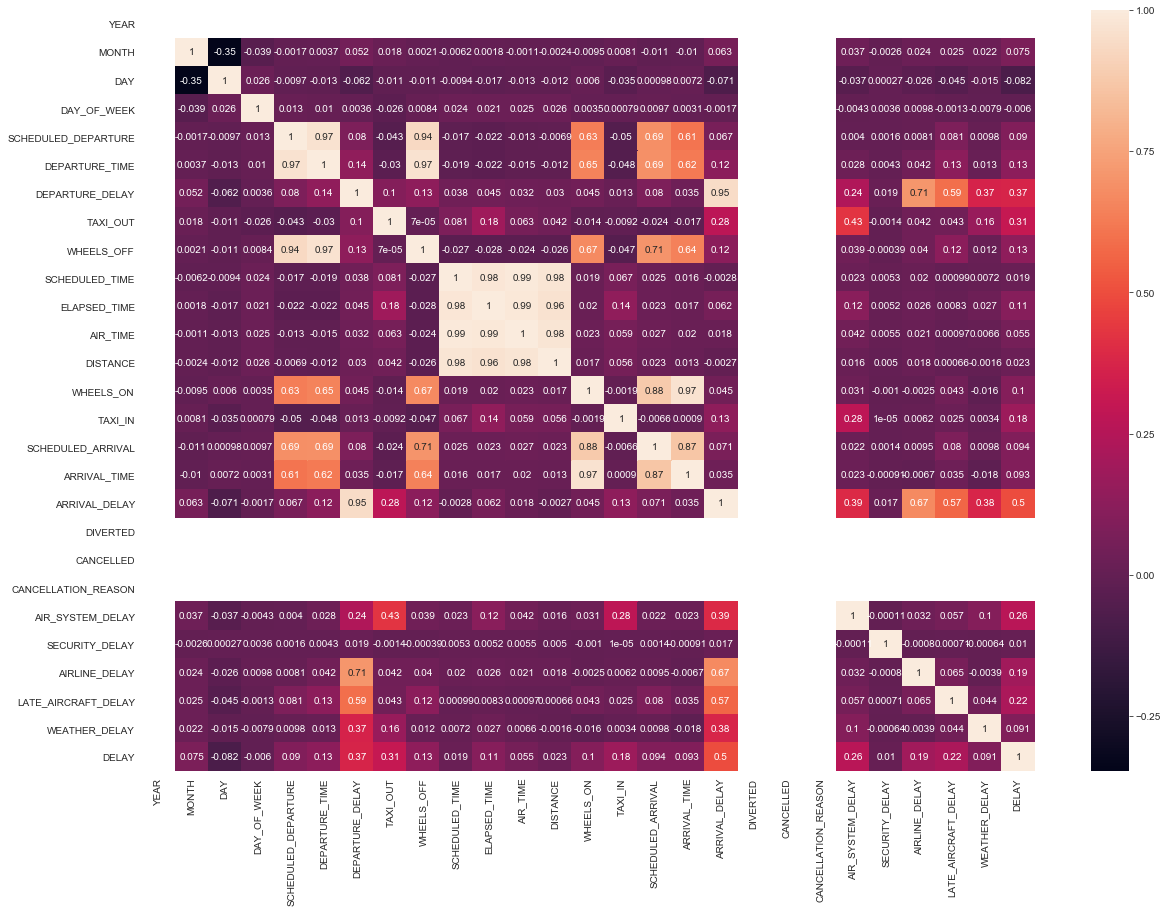

In [27]:
#Checking how correlated our features are
axis = plt.subplots(figsize=(20,14))
sns.heatmap(data_3.corr(),annot = True)
plt.show()

ARRIVAL_DELAY is correlated with these features in this order: DEPARTURE_DELAY(0.95), AIRLINE_DELAY(0.67), LATE_AIRCRAFT_DELAY(0.57), AIR_SYSTEM_DELAY(0.39).

In [28]:
data_3.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE', 'DELAY'],
      dtype='object')

In [29]:


# Choosing the predictors
few_features = [
    'LATE_AIRCRAFT_DELAY'
    ,'AIRLINE_DELAY'
    ,'AIR_SYSTEM_DELAY'
    ,'WEATHER_DELAY'
    ,'ELAPSED_TIME']

# New dataframe based on a few features 
X_few = data_3[few_features]

In [31]:
#Label definition
y = data_3['DELAY']

In [32]:
# RandomForestClassifier with 10 trees and fitted on the small feature set 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10, random_state=42) 
clf.fit(X_few, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [33]:
importances=clf.feature_importances_
importances=pd.DataFrame([X_few.columns,importances]).transpose()
importances.columns=[['Variables','Importance']]
importances

,Variables,Importance
0,LATE_AIRCRAFT_DELAY,0.205425
1,AIRLINE_DELAY,0.384653
2,AIR_SYSTEM_DELAY,0.337434
3,WEATHER_DELAY,0.0448264
4,ELAPSED_TIME,0.0276622


AIRLINE_DELAY appears to have more influence on the flights delays: it was the lowest in our correlation list above . We will add more features running some model and see which of them has more influence on the flight delays.

In [34]:
# choosing the features
feature = [
    'YEAR'
    ,'MONTH'
    ,'DAY'
    ,'LATE_AIRCRAFT_DELAY'
    ,'AIRLINE_DELAY'
    ,'AIR_SYSTEM_DELAY'
    ,'WEATHER_DELAY'
    ,'ELAPSED_TIME'
    ,'DEPARTURE_DELAY'
    ,'SCHEDULED_TIME'
    ,'AIR_TIME'
    ,'DISTANCE'
    ,'TAXI_IN'
    ,'TAXI_OUT'
    ,'DAY_OF_WEEK'
    ,'SECURITY_DELAY'
]
import random
random.seed(0)
#To reduce the computation time, we will randomly select a sample of 50000 records 
X = data_3[feature]

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322045 entries, 29311 to 441107
Data columns (total 16 columns):
YEAR                   322045 non-null int64
MONTH                  322045 non-null int64
DAY                    322045 non-null int64
LATE_AIRCRAFT_DELAY    322045 non-null float64
AIRLINE_DELAY          322045 non-null float64
AIR_SYSTEM_DELAY       322045 non-null float64
WEATHER_DELAY          322045 non-null float64
ELAPSED_TIME           322045 non-null float64
DEPARTURE_DELAY        322045 non-null float64
SCHEDULED_TIME         322045 non-null float64
AIR_TIME               322045 non-null float64
DISTANCE               322045 non-null int64
TAXI_IN                322045 non-null float64
TAXI_OUT               322045 non-null float64
DAY_OF_WEEK            322045 non-null int64
SECURITY_DELAY         322045 non-null float64
dtypes: float64(11), int64(5)
memory usage: 51.8 MB


In [37]:
#Label definition
y = data_3['DELAY']

In [38]:
#We will split the record in two, the test and train data before we run the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40 )

In [39]:
#Scaling our data
from sklearn.preprocessing import scale
X_train=scale(X_train)
X_test=scale(X_test)

In [40]:
model = LinearRegression()
model = model.fit(X_train, y_train)
slope = model.coef_
coef = model.intercept_
print(slope.flatten())
print(coef)

[ 0.00000000e+00  2.06586177e-03 -5.79871016e-03 -6.42801397e-01
 -8.72074349e-01 -3.44441445e-01 -4.61784546e-01 -1.39988667e+11
  1.40931205e+00 -2.31597816e+00  1.36715082e+11 -5.38156080e-02
  1.12993136e+10  1.72516525e+10  1.83722183e-03 -1.90929029e-02]
0.40726183468203087


In [41]:
y_pred = model.predict(X_test)

In [42]:
r2_score(y_test,y_pred)

-6.267284372767284e+17

The r2_score for linear regression is negative because the chosen model does not follow the trend of the data, so fits worse than a horizontal line.We will start with a "regular" tree as a baseline, the DecisionTreeClassifier

In [47]:
# Instantiate and fit a DecisionRegressor
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)





In [48]:
r2_score(y_test, y_pred)


0.7493928652881671

We have good value for our r2_score. let see what are the most important features.

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

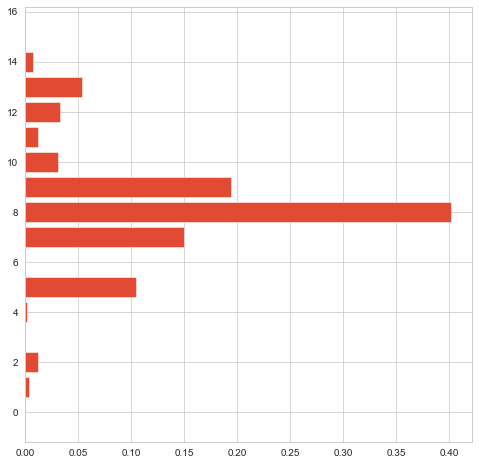

In [51]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), regressor.feature_importances_, align='center') 
    plt.yticks(range(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(regressor)

Even with the error message it is clear that Departure delay appears to be the most important factor in flight delays.

In [53]:
# Instantiate a BaggingRegressor
bagged_tree =  BaggingRegressor(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)

In [54]:
bagged_tree.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=5,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                

In [55]:
# Training accuracy score
bagged_tree.score(X_train, y_train)

0.41135786930348406

In [56]:
# Test accuracy score
bagged_tree.score(X_test, y_test)

0.4203590905985859

The two scores for bagged tree are really close to the portion of the flight delay we have anticipated in reality. we may be in a situation of overfitting.

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

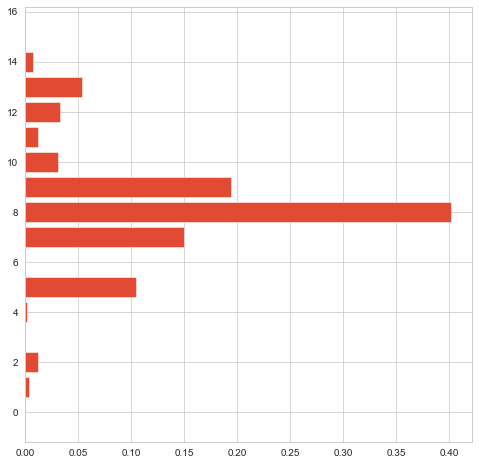

In [57]:

plot_feature_importances(bagged_tree)

Departure delay is the most important feature here too. We will try random forest now

In [58]:
# Instantiate and fit a RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:
# Training accuracy score
forest.score(X_train, y_train)

0.5399511255716121

In [60]:
# Training accuracy score
forest.score(X_test, y_test)

0.5473946496804214

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

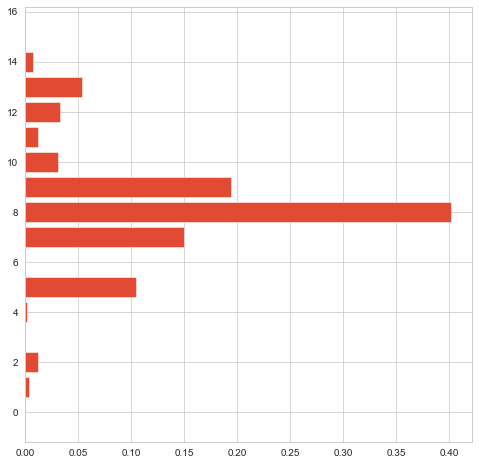

In [61]:
plot_feature_importances(forest)

We could have use the grid search to find the parameters that will help us tune the model very well. Time didnt allow us to do that. we will keep this as future work.